In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
data=pd.read_csv("iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
data.shape

(150, 5)

In [75]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [76]:
data.index

RangeIndex(start=0, stop=150, step=1)

In [77]:
data.isnull().sum().sum()

0

In [78]:
print(data.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Univarient Plots

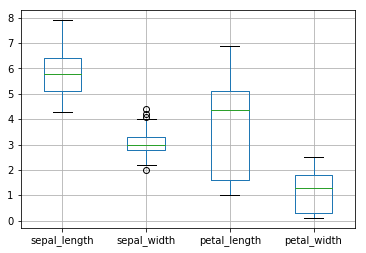

In [79]:
data.boxplot()

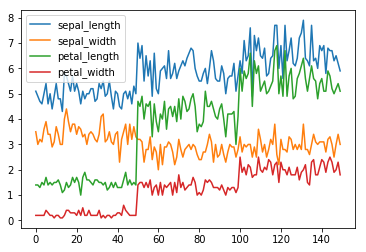

In [80]:
data.plot()

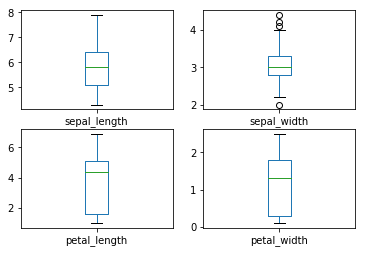

In [81]:
data.plot(kind='box',subplots='true',layout=(2,2))
plt.show()

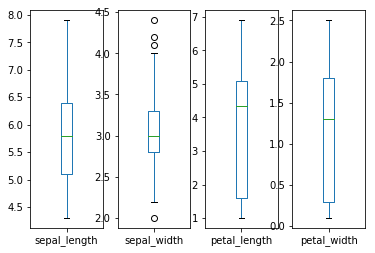

In [82]:
data.plot(kind='box',subplots='true')
plt.show()

In [83]:
x=data.iloc[:,0:4].values
y=data.iloc[:,4].values

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)# state=1

In [86]:
log_reg1=LogisticRegression()
log_reg1.fit(x_train,y_train)
y_pred=log_reg1.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [87]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [88]:
log_reg1.predict(x_test)

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

# Naive Bayes
- p(class/data)=(p(data/class)*p(class))/p(data)

### Calculate probability of playing
- p(play=yes/overcast)=(p(overcast/yes)*p(yes))/p(overcast)==>Eq(1)
 1. Calculate prior probabilities
    - p(overcast)=4/14=0.29
 2. Calculate posterior probabilities
     - p(yes)=9/14=0.64
 3. Put Prior and posterior Probabilities in Eq(1)
     - p(yes/overcast)=0.44*0.64/0.29=0.98(Higher)

### Playing of not Playing
- p(play=no/overcast)=(p(overcast/no)*p(no))/p(overcast)==>Eq(2)
 1. Calculate prior Probabilities :
     - p(overcast)=4/14=0.29
     - p(np)=5/14=0.36
 2. Calculate Posteror Probabilities:
     - p(overcast/no)=0/9=0
 3. Put prior and poserior probabilities in Eq(2)
     - p(no/overcast)=0*0.36/0.29=0

<img src="im.png" width=100 height=100>

<img src="im1.png" width=500 height=500>

### Probability of Playing
- p(play=yes|overcast,Mild)=p(overcast,Mild|yes)*p(yes)===>Eq(1)
- p(overcast,Mild|play=yes)=p(overcast|yes)*p(Mild|yes)===>Eq(212)
    1. Calculate Prior Probabilities
        - p(play=yes)=9/14=0.64
    2. Calculate Posterior Probabilities
        - p(Overcast|play=yes)=4/9=0.44
        - p(Mild|play=yes)=4/9=0.44
    3. Put Posterior Probabilities  in Eq(2)
        - p(overcast,Temp=Mild|yes)=0.44*0.44=0.1936(Higher)
    4. Put Prior and Psterior Probabilities in Eq(1)
        - p(play=yes|Overcast,Temp=Mild)=0.64*0.1936=0.124

### Probability of not Playing
- p(play=No|overcast,Mild)=p(overcast,Mild|No)*p(No)===>Eq(3)
- p(overcast,Mild|play=No)=p(overcast|No)*p(Mild|No)===>Eq(4)
    1. Calculate Prior Probabilities
        - p(play=No)=5/14=0.36
    2. Calculate Posterior Probabilities
        - p(Overcast|play=No)=0/9=0
        - p(Mild|play=No)=2/5=0.4
    3. Put Posterior Probabilities  in Eq(4)
        - p(overcast,Temp=Mild|No)=0*0.4=0
    4. Put Prior and Psterior Probabilities in Eq(3)
        - p(play=No|Overcast,Temp=Mild)=0*0.36=0

In [94]:
data=pd.read_csv("playtennis.csv")

## Encoding Feature
- we need to convert these string labels into numerical
    - eg: 'overcast','rainy','sunny' as 0,1,2
- this is known as label encoding
- scikit-Learn provides 'LabelEncoder' library for encoding label values between 0 and one less than the no. of discrete classes. 

In [97]:
data.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [98]:
from sklearn.preprocessing import LabelEncoder 

In [114]:
le=LabelEncoder()
data['Outlook']=le.fit_transform(data['Outlook'])
data['Temperature']=le.fit_transform(data['Temperature'])
data['Humidity']=le.fit_transform(data['Humidity'])
data['Wind']=le.fit_transform(data['Wind'])
data['Play Tennis']=le.fit_transform(data['Play Tennis'])

In [115]:
data.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [116]:
x=data[['Outlook','Temperature','Humidity','Wind']]
y=data[['Play Tennis']]

### Apply Navie Bayes Model

In [117]:
from sklearn.naive_bayes import GaussianNB

In [118]:
gnb=GaussianNB()
gnb.fit(x,y)
y_pre=gnb.predict(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [119]:
y_pre

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [120]:
gnb.predict([[0,0,1,0]])

array([1])

### Check Accuracy

In [122]:
from sklearn.metrics import accuracy_score

In [126]:
accurcy=accuracy_score(y,y_pre)
print(accurcy)

0.9285714285714286
